In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("../dataset/raw/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [159]:
df=df.drop(columns=['RowNumber','CustomerId','Surname','IsActiveMember'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,113931.57,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0


In [160]:
normal=df

df = pd.get_dummies(df)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,101348.88,1,True,False,False,True,False
1,608,41,1,83807.86,1,0,112542.58,0,False,False,True,True,False
2,502,42,8,159660.80,3,1,113931.57,1,True,False,False,True,False
3,699,39,1,0.00,2,0,93826.63,0,True,False,False,True,False
4,850,43,2,125510.82,1,1,79084.10,0,False,False,True,True,False


In [161]:
count=df.Exited.value_counts()
count

Exited
0    7963
1    2037
Name: count, dtype: int64

Text(0, 0.5, 'Count')

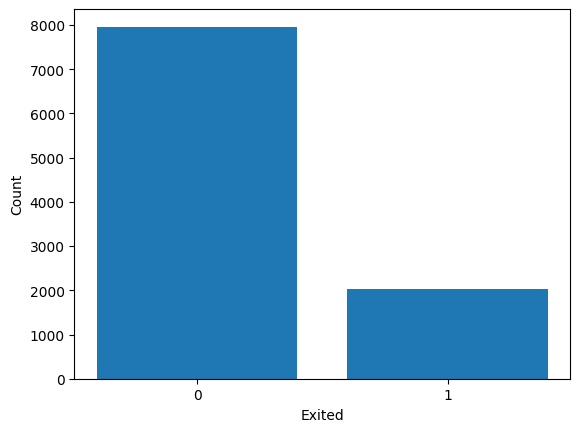

In [162]:
plt.bar(['0','1'],count.values)
plt.xlabel("Exited")
plt.ylabel("Count")

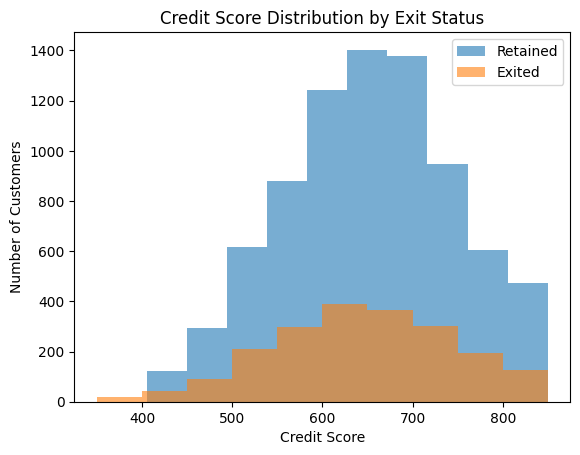

In [163]:
credit_score_0 = df[df["Exited"] == 0]["CreditScore"]
credit_score_1 = df[df["Exited"] == 1]["CreditScore"]

plt.hist(credit_score_0, alpha=0.6, label="Retained")
plt.hist(credit_score_1, alpha=0.6, label="Exited")

plt.xlabel("Credit Score")
plt.ylabel("Number of Customers")
plt.title("Credit Score Distribution by Exit Status")
plt.legend()

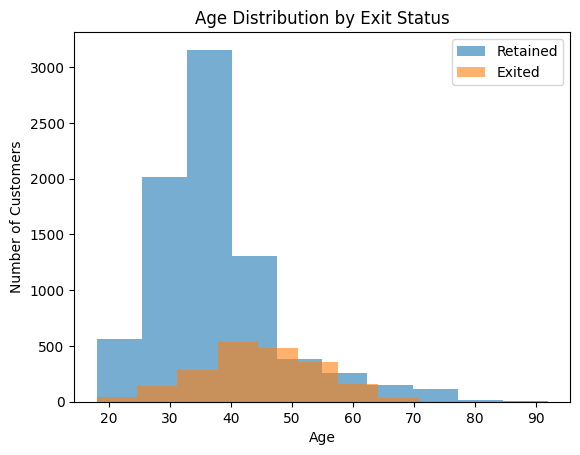

In [164]:
age_0 = df[df["Exited"] == 0]["Age"]
age_1 = df[df["Exited"] == 1]["Age"]

plt.hist(age_0, alpha=0.6, label="Retained")
plt.hist(age_1, alpha=0.6, label="Exited")

plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.title("Age Distribution by Exit Status")
plt.legend()

In [165]:
pd.crosstab(df.HasCrCard,df.Exited)

Exited,0,1
HasCrCard,,
0,2332,613
1,5631,1424


In [166]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=['Exited']),df.Exited,test_size=0.2,random_state=42)

In [167]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

In [168]:
model1.fit(X_train,y_train)

C:\Users\surya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [169]:
print("Model accuracy:",model1.score(X_test,y_test))

y_pred=model1.predict(X_test)

Model accuracy: 0.8005


In [170]:
from sklearn.metrics import precision_score,recall_score
print("Precision:",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))

Precision: 0.45714285714285713
Recall:  0.08142493638676845


In [171]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=220,max_depth=10,random_state=42)

In [172]:
model2.fit(X_train,y_train)

,n_estimators,220
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [173]:
print("Model accuracy:",model2.score(X_test,y_test))

y_pred=model2.predict(X_test)

Model accuracy: 0.8615


In [174]:
print("Precision:",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))

Precision: 0.7710280373831776
Recall:  0.4198473282442748


In [175]:
from xgboost import XGBClassifier
model3=XGBClassifier(learning_rate=0.1,max_depth=5,n_estimators=100)

In [176]:
model3.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [177]:
print("Model accuracy:",model3.score(X_test,y_test))

y_pred=model3.predict(X_test)

Model accuracy: 0.8635


In [178]:
print("Precision:",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))

Precision: 0.734375
Recall:  0.47837150127226463


Hence we can conclude that XGBoost is the best Model

In [179]:
final=normal.copy()
final["Exited_Prob"]=model3.predict_proba(df.drop(columns=['Exited']))[:,1]
final["Exited_Pred"]=model3.predict(df.drop(columns=['Exited']))
final.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,Exited_Prob,Exited_Pred
0,619,France,Female,42,2,0.00,1,1,101348.88,1,0.400436,0
1,608,Spain,Female,41,1,83807.86,1,0,112542.58,0,0.209890,0
2,502,France,Female,42,8,159660.80,3,1,113931.57,1,0.979957,1
3,699,France,Female,39,1,0.00,2,0,93826.63,0,0.049582,0
4,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,0.111984,0


In [180]:
final.to_csv("Chrun_Pred.csv")